In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report, confusion_matrix
from keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, Conv1D, GlobalMaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping,Callback,CSVLogger
from keras.models import Sequential, load_model,Model , clone_model
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.ensemble import StackingClassifier,VotingClassifier
from keras.layers import Activation, Dense, Reshape, Input
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from keras.preprocessing.text import Tokenizer
from keras.losses import BinaryCrossentropy
from sklearn.naive_bayes import GaussianNB
from keras.backend import clear_session
from keras.initializers import Constant
from threading import current_thread
from keras.utils import plot_model
from sklearn.utils import shuffle
from keras.optimizers import Adam
from keras.utils import Sequence
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from keras import backend as K
from numpy.linalg import norm
from functools import partial
from random import uniform
from numpy import asarray
import concurrent.futures
from keras import layers
import matplotlib as mpl
from sklearn import svm
from keras import Model
from numpy import save
from numpy import load
import seaborn as sns
from time import time
import pandas as pd
import numpy as np
import warnings
import urllib
import random
import pickle
import math
import html
import nltk
import os
import re
import gc
warnings.filterwarnings("ignore")
np.random.seed(123)
plt.style.use('ggplot')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
par_path = "/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/On JavaScript File/Hiden"
model_info_path = "/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/On JavaScript File/Results_TabuSearch3/Model info"
results_path = "/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/On JavaScript File/Ensemble Learning Resultes"
results_path_ = "/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/On JavaScript File/Results_TabuSearch3"
statistical_information = "/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/On JavaScript File/statistical information"

In [4]:
def save_object(obj, filename,path):
    """
    _ INPUT (obj) THE OBJECT WE NEED SAVW IT (filename) THE NAME OF OBJECT
    """
    filename = os.path.join(path,filename)
    with open(filename+".pkl", 'wb') as outp:
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)
    outp.close()
def load_object(filename,path):
    """
    _ INPUT THE NAME OF OBJECT WE NEED LOAD IT
    """
    filename = os.path.join(path,filename)
    with open(filename+".pkl", 'rb') as outp:
        loaded_object = pickle.load(outp)
    outp.close()
    return loaded_object

In [5]:
def get_statistical_information(X):
  new_x = []
  for x in X:
    new_x.append(np.array([np.ndarray.min(x),np.ndarray.max(x),np.ndarray.mean(x),np.ndarray.std(x),np.median(x),np.var(x)]))
  return np.array(new_x)

In [6]:
def apply_mask(X,mask,cluster=None):
  if cluster is None:
    for i,x in enumerate(X):
      X[i] = x*mask
  else:
    for i,x in enumerate(X):
      X[i] = x*mask[cluster[i]]
  return X

In [7]:
number_of_chunk =[i[:-5] for i in os.listdir(par_path)[::-1] if i[:7]=='X_train']
number_of_chunk = number_of_chunk[:-1]
model = load_model(os.path.join(model_info_path,"tabu_search_model_.h5"))
sub_model = Model(inputs=model.input,outputs=model.layers[-3].output)
number_of_calss = 35
agglomerativeClustering = AgglomerativeClustering(n_clusters=number_of_calss, affinity='euclidean')

In [8]:
def evaluate_model(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  F1_score = f1_score(y_test, y_pred)
  return accuracy,precision,recall,F1_score

In [9]:
def get_stacking():
	level0 = list()
	level0.append(('lr1', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart1', DecisionTreeClassifier()))
	level0.append(('cart2', DecisionTreeClassifier()))
	level0.append(('cart3', DecisionTreeClassifier()))
	level0.append(('cart4', DecisionTreeClassifier()))
	level0.append(('svm1', svm.SVC()))
	level0.append(('svm2', svm.SVC()))
	level0.append(('svm3', svm.SVC()))
	level0.append(('bayes', GaussianNB()))
	level1 = LogisticRegression()
	Stacking_Classifier = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return Stacking_Classifier

In [10]:
def get_voting():
 models = list()
 models.append(('lr1', LogisticRegression()))
 models.append(('knn1', KNeighborsClassifier()))
 models.append(('cart1', DecisionTreeClassifier()))
 models.append(('cart2', DecisionTreeClassifier()))
 models.append(('cart3', DecisionTreeClassifier()))
 models.append(('svm1', svm.SVC()))
 models.append(('svm2', svm.SVC()))
 models.append(('svm3', svm.SVC()))
 models.append(('bayes', GaussianNB()))
 ensemble = VotingClassifier(estimators=models, voting='hard')
 return ensemble

In [11]:
def Matric_dic():
  return {"accuracy_score":[],"precision_score":[],"recall_score":[],"f1_score":[]}

In [12]:
Results = {'Stacking Ensemble Learning':Matric_dic(),'Voting Ensemble Learning':Matric_dic(),'Bagging Ensemble Learning':Matric_dic(),'GradientBoosting Ensemble Learning':Matric_dic()}
METHODE = list(Results.keys())
MARTIC = list(Results[METHODE[0]].keys())

In [13]:
# for i,x in tqdm(enumerate(number_of_chunk)):
#   X_train , y_train = load_object('X_train_hiden_for_chunk_'+str(i),par_path) , load_object('y_train_hiden_for_chunk_'+str(i),par_path)
#   X_test , y_test = load_object('X_test_hiden_for_chunk_'+str(i),par_path) , load_object('y_test_hiden_for_chunk_'+str(i),par_path)


#   cluster_test = load_object('cluster_test_'+str(i),results_path_)
#   solution = load_object('best_solution__'+str(i),results_path_)
#   cluster_train = load_object('cluster_train_'+str(i),results_path_)

#   x_train = apply_mask(X_train,solution,cluster_train)
#   x_test = apply_mask(X_test,solution,cluster_test)

#   X_train = sub_model.predict(x_train,verbose=False)
#   X_test = sub_model.predict(x_test,verbose=False)

#   stacking_model = get_stacking()
#   stacking_model.fit(X_train,y_train)
#   y_pred = stacking_model.predict(X_test)
#   accuracy,precision,recall,F1_score = evaluate_model(y_test, y_pred)
#   Results[METHODE[0]][MARTIC[0]].append(accuracy)
#   Results[METHODE[0]][MARTIC[1]].append(precision)
#   Results[METHODE[0]][MARTIC[2]].append(recall)
#   Results[METHODE[0]][MARTIC[3]].append(F1_score)

#   voting_model = get_voting()
#   voting_model.fit(X_train,y_train)
#   y_pred = voting_model.predict(X_test)
#   accuracy,precision,recall,F1_score = evaluate_model(y_test, y_pred)
#   Results[METHODE[1]][MARTIC[0]].append(accuracy)
#   Results[METHODE[1]][MARTIC[1]].append(precision)
#   Results[METHODE[1]][MARTIC[2]].append(recall)
#   Results[METHODE[1]][MARTIC[3]].append(F1_score)

#   bagging_model = BaggingClassifier()
#   bagging_model.fit(X_train,y_train)
#   y_pred = bagging_model.predict(X_test)
#   accuracy,precision,recall,F1_score = evaluate_model(y_test, y_pred)
#   Results[METHODE[2]][MARTIC[0]].append(accuracy)
#   Results[METHODE[2]][MARTIC[1]].append(precision)
#   Results[METHODE[2]][MARTIC[2]].append(recall)
#   Results[METHODE[2]][MARTIC[3]].append(F1_score)

#   GradientBoosting_model = GradientBoostingClassifier()
#   GradientBoosting_model.fit(X_train,y_train)
#   y_pred = GradientBoosting_model.predict(X_test)
#   accuracy,precision,recall,F1_score = evaluate_model(y_test, y_pred)
#   Results[METHODE[3]][MARTIC[0]].append(accuracy)
#   Results[METHODE[3]][MARTIC[1]].append(precision)
#   Results[METHODE[3]][MARTIC[2]].append(recall)
#   Results[METHODE[3]][MARTIC[3]].append(F1_score)
#   save_object(Results, 'Results',results_path)
#   print(Results)
#   gc.collect()

In [19]:
r = len(number_of_chunk)
Ensemble_Results = load_object('Results',results_path)
FSR_Results = load_object("Results",statistical_information)
Tabu_search = pd.read_csv(os.path.join(os.path.join(results_path_,'Imges'),"Numerical results.csv"))
tabu_search_results = {"accuracy_score":Tabu_search['Accuracy_score'].tolist()[:r],
                       "precision_score":Tabu_search['Precision_score'].tolist()[:r],
                       "recall_score":Tabu_search['Recall_score'].tolist()[:r],
                       "f1_score":Tabu_search['F1_score'].tolist()[:r]}

FSR = list(FSR_Results.keys())

In [20]:
def plot_results(metric_name, methods_name, results, colors, step=1):
    plt.figure(figsize=(15, 5))
    plt.title(metric_name)
    for k, result in enumerate(results):
        x = [i for i, x in enumerate(results[k]) if i % step == 0]
        y = [x for i, x in enumerate(results[k]) if i % step == 0]
        plt.plot(x, y,  label=methods_name[k],color=colors[k])
        plt.scatter(x, y,s=20)  # Add dots to the plot

    plt.legend(loc="best")
    plt.xlabel('Chunk number')
    plt.ylabel('Results per Chunk')

    # Format x-axis ticks as integers
    plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(step))
    plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter(useOffset=False, useMathText=True))

    name_image = metric_name
    save_path = results_path

    plt.savefig(os.path.join(save_path, name_image+".png"))
    plt.savefig(os.path.join(save_path, name_image+'.svg'), format='svg')
    plt.show()

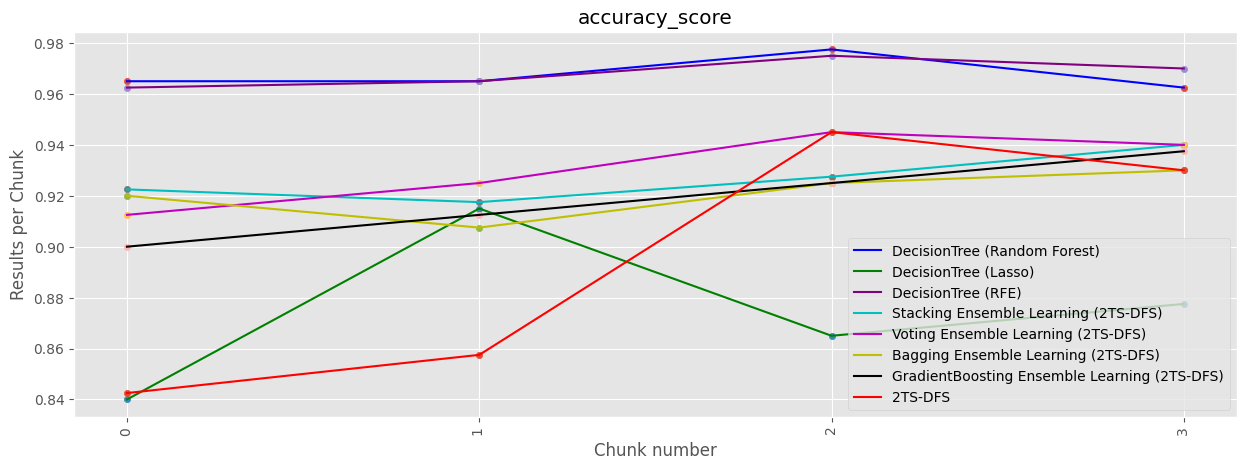

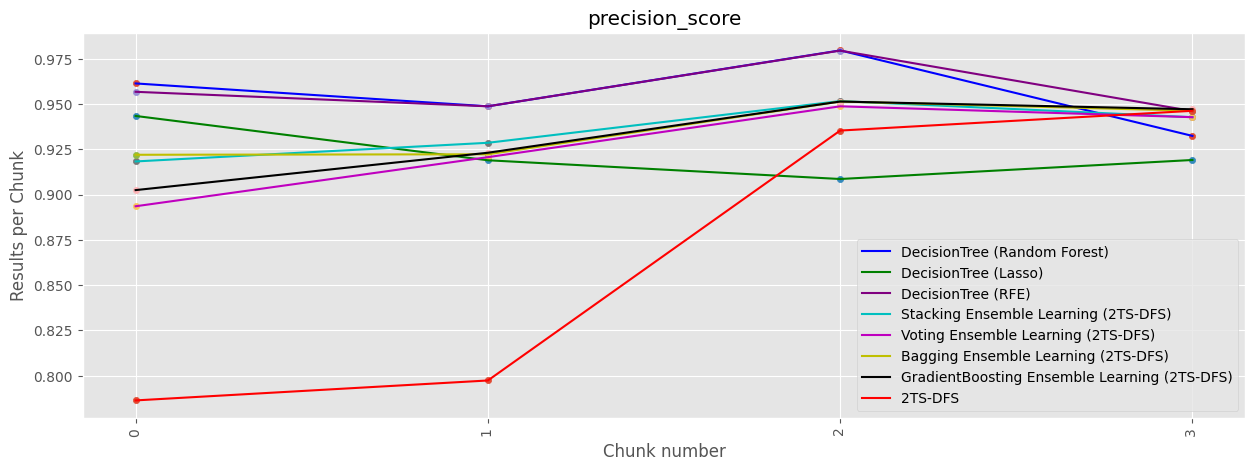

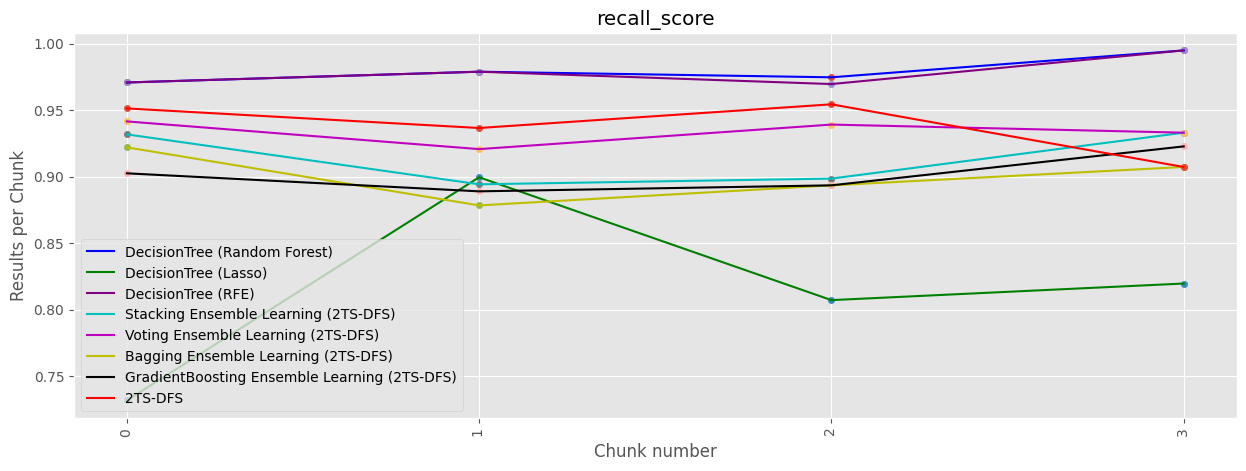

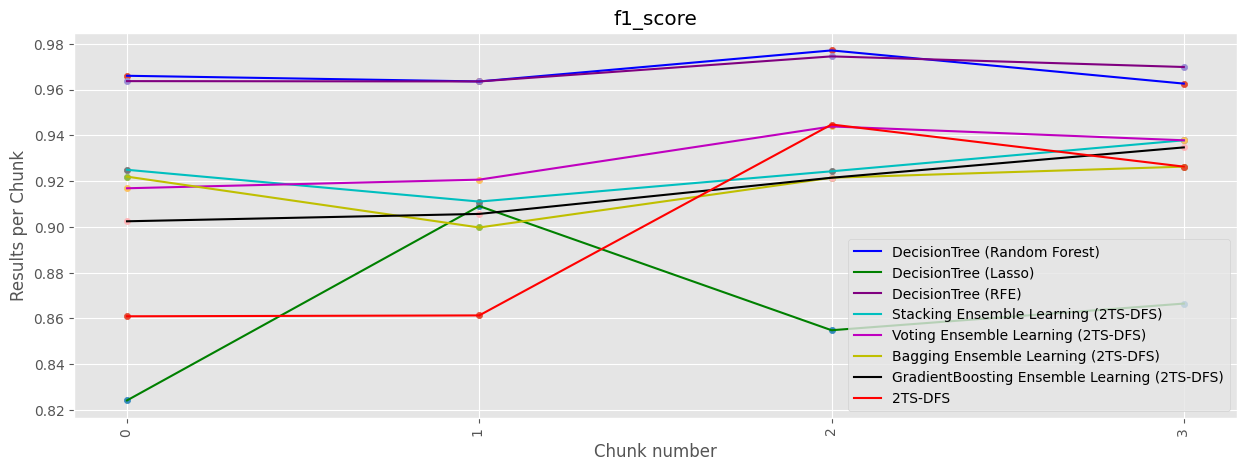

DecisionTree (Random Forest)                                         \
                accuracy_score precision_score recall_score  f1_score   
0                       0.9650        0.961353     0.970732  0.966019   
1                       0.9650        0.948718     0.978836  0.963542   
2                       0.9775        0.979592     0.974619  0.977099   
3                       0.9625        0.932367     0.994845  0.962594   

  DecisionTree (Lasso)                                         \
        accuracy_score precision_score recall_score  f1_score   
0               0.8400        0.943396     0.731707  0.824176   
1               0.9150        0.918919     0.899471  0.909091   
2               0.8650        0.908571     0.807107  0.854839   
3               0.8775        0.919075     0.819588  0.866485   

  DecisionTree (RFE)                  ... Bagging Ensemble Learning (2TS-DFS)  \
      accuracy_score precision_score  ...                        recall_score   
0             0.9625        0.956731  ...                            0.921951   
1             0.9650        0.948718  ...                            0.878307   
2             0.9750        0.979487  ...                            0.893401   
3             0.9700        0.946078  ...                            0.907216   

            GradientBoosting Ensemble Learning (2TS-DFS)                  \
   f1_score                               accuracy_score precision_score   
0  0.921951                                       0.9000        0.902439   
1  0.899729                                       0.9125        0.923077   
2  0.921466                                       0.9250        0.951351   
3  0.926316                                       0.9375        0.947090   

                                2TS-DFS                                         
  recall_score  f1_score accuracy_score precision_score recall_score  f1_score  
0     0.902439  0.902439         0.8425        0.786290     0.951220  0.860927  
1     0.888889  0.905660         0.8575        0.797297     0.936508  0.861314  
2     0.893401  0.921466         0.9450        0.935323     0.954315  0.944724  
3     0.922680  0.934726         0.9300        0.946237     0.907216  0.926316  

[4 rows x 32 columns]

In [21]:
methods_name = []
colors = ['b', 'g', 'purple', 'c', 'm', 'y', 'k', 'r']
for i in range(len(MARTIC)):
  results = [FSR_Results[FSR[0]]['DecisionTree'][MARTIC[i]],
             FSR_Results[FSR[1]]['DecisionTree'][MARTIC[i]],
             FSR_Results[FSR[2]]['DecisionTree'][MARTIC[i]],
             Ensemble_Results[METHODE[0]][MARTIC[i]],
             Ensemble_Results[METHODE[1]][MARTIC[i]],
             Ensemble_Results[METHODE[2]][MARTIC[i]],
             Ensemble_Results[METHODE[3]][MARTIC[i]],
             tabu_search_results[MARTIC[i]]]
  methods_name.append("DecisionTree ({})".format(FSR[0]))
  methods_name.append("DecisionTree ({})".format(FSR[1]))
  methods_name.append("DecisionTree ({})".format(FSR[2]))
  methods_name.append(METHODE[0]+" ({})".format('2TS-DFS'))
  methods_name.append(METHODE[1]+" ({})".format('2TS-DFS'))
  methods_name.append(METHODE[2]+" ({})".format('2TS-DFS'))
  methods_name.append(METHODE[3]+" ({})".format('2TS-DFS'))
  methods_name.append('2TS-DFS')
  plot_results(MARTIC[i],methods_name,results,colors)

  if i==0:
    subheadings = methods_name
    column_headings = MARTIC
    columns = pd.MultiIndex.from_product([subheadings, column_headings])
    df = pd.DataFrame(columns=columns)

  for j in range(len(methods_name)):
    df[methods_name[j],MARTIC[i]]=results[j]

  df.to_csv(os.path.join(results_path,"Numerical Results.csv"),index=False)
  methods_name = []
df.head()
